In [43]:
import numpy as np

In [87]:
drill_bit_setups = { # Cost Per Run, Cost Per Foot, Cost Per Hour
    'Buzz Drilldrin': (5000, 1.5, 0),
    'AstroBit': (3000, 1, 1500),
    'Apollo': (1000, 4, 2500),
    'ChallengDriller': (10000, 0, 0),
}

In [127]:
import csv

asteroids = []
for i in range(1, 21):
    measurements = []
    with open(f'Asteroids/Asteroid {i}.csv', newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(reader):
            if i == 0:
                headers = row
                continue
            measurements.append(row)
    asteroids.append((measurements))

In [128]:
import matplotlib.pyplot as plt

asteroid_data = []

for asteroid in asteroids:
    prev_id = None

    drill_bits = []
    depths = []
    penetration_rates = []
    hook_loads = []
    pressures = []
    weights = []
    times = []
    costs = [] # cost for each run

    cur_time = 0
    for measurement in asteroid:
        bit_depth, rate_of_penetration, hook_load, differential_pressure, weight_on_bit, drill_bit_id, drill_bit_name = measurement
        if bit_depth == '' or rate_of_penetration == '' or hook_load == '' or differential_pressure == '' or weight_on_bit == '':
            continue
        if float(bit_depth) < 0:
            continue
        if float(rate_of_penetration) <= 0:
            continue
        
        if len(depths) > 0:
            delta_depth = float(bit_depth) - float(depths[-1][-1])
            if delta_depth < 0:
                continue
            delta_time = delta_depth / float(rate_of_penetration) # hours
            cur_time += delta_time

        if drill_bit_id != prev_id:
            drill_bits.append(f'{drill_bit_id} ({drill_bit_name})')

            cur_time += float(bit_depth) * 2 / 100.0 * (30 * 1/60.0 * 1/60.0)

            if len(depths) > 0:
                distance = depths[-1][-1] - depths[-1][0]
                elapsed_time = times[-1][-1] - times[-1][0]

                cost_per_run, cost_per_foot, cost_per_hour = drill_bit_setups[drill_bit_name]
                costs.append(cost_per_run + distance * cost_per_foot + elapsed_time * cost_per_hour)

            depths.append([])
            penetration_rates.append([])
            hook_loads.append([])
            pressures.append([])
            weights.append([])
            times.append([])

        depths[-1].append(float(bit_depth))

        penetration_rates[-1].append(float(rate_of_penetration))

        hook_loads[-1].append(float(hook_load))

        pressures[-1].append(float(differential_pressure))

        weights[-1].append(float(weight_on_bit))

        times[-1].append(cur_time)

        prev_id = drill_bit_id

    if len(depths) > 0:
        distance = depths[-1][-1] - depths[-1][0]
        elapsed_time = times[-1][-1] - times[-1][0]

        cost_per_run, cost_per_foot, cost_per_hour = drill_bit_setups[drill_bit_name]
        costs.append(cost_per_run + distance * cost_per_foot + elapsed_time * cost_per_hour)

    asteroid_data.append((drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs))

In [148]:
for i, data in enumerate(asteroid_data):
    drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs = data

    total_time = times[-1][-1]
    total_depth = depths[-1][-1]
    total_cost = sum(costs)
    
    print(f'Asteroid {i + 1}', f'Depth per hour: {total_depth / total_time}', total_cost / total_depth)

Asteroid 1 72.59550093217851 5.194135578514447
Asteroid 2 79.60043226626061 35.134204800015084
Asteroid 3 109.19651848322397 14.83453269254495
Asteroid 4 186.79853422162563 7.844212766366053
Asteroid 5 150.84208272844091 7.929767493622202
Asteroid 6 115.59733375803356 3.12164954979294
Asteroid 7 108.96410415825672 1.1187872346376528
Asteroid 8 96.9996738046414 1.742025667571537
Asteroid 9 200.2366639537047 10.860137088231038
Asteroid 10 157.64025675228723 5.395443787988399
Asteroid 11 159.2854231918166 12.044388404806723
Asteroid 12 72.76544702296589 13.392484973852145
Asteroid 13 101.90572370913426 25.950835601368365
Asteroid 14 128.1218400424689 18.26829912854682
Asteroid 15 182.524472615154 3.098765682656827
Asteroid 16 157.37474422654023 1.1259524149990372
Asteroid 17 104.31837857954136 19.207535509294335
Asteroid 18 172.55834520107516 5.460332419686357
Asteroid 19 142.0861093982094 5.836050961821011
Asteroid 20 111.80563102531278 9.846574723756337


In [131]:
drill_bits, depths, penetration_rates, hook_loads, pressures, weights, times, costs = asteroid_data[-1]

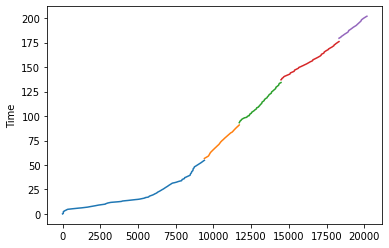

In [132]:
runs = []

cur = 0
for time_run in times:
    plt.plot(np.arange(cur, cur + len(time_run)), time_run)
    cur = cur + len(time_run)

plt.ylabel('Time')
plt.show()

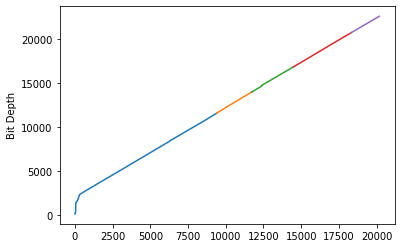

In [133]:
runs = []

cur = 0
for depth_run in depths:
    plt.plot(np.arange(cur, cur + len(depth_run)), depth_run)
    cur = cur + len(depth_run)

plt.ylabel('Bit Depth')
plt.show()

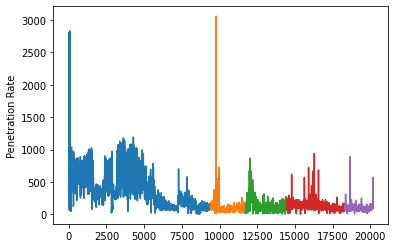

In [134]:
runs = []

cur = 0
for penetration_run in penetration_rates:
    plt.plot(np.arange(cur, cur + len(penetration_run)), penetration_run)
    cur = cur + len(penetration_run)

plt.ylabel('Penetration Rate')
plt.show()

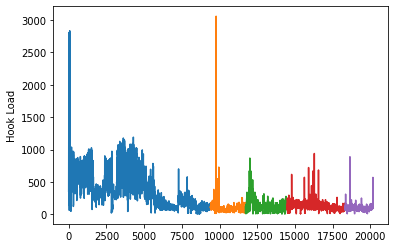

In [137]:
runs = []

cur = 0
for hook_load_run in penetration_rates:
    plt.plot(np.arange(cur, cur + len(hook_load_run)), hook_load_run)
    cur = cur + len(hook_load_run)

plt.ylabel('Hook Load')
plt.show()

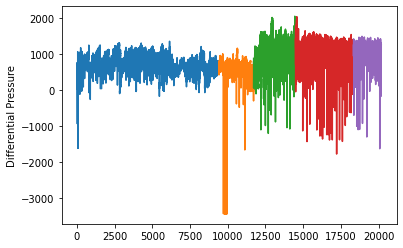

In [138]:
runs = []

cur = 0
for pressure_run in pressures:
    plt.plot(np.arange(cur, cur + len(pressure_run)), pressure_run)
    cur = cur + len(pressure_run)

plt.ylabel('Differential Pressure')
plt.show()

Text(0, 0.5, 'Cost')

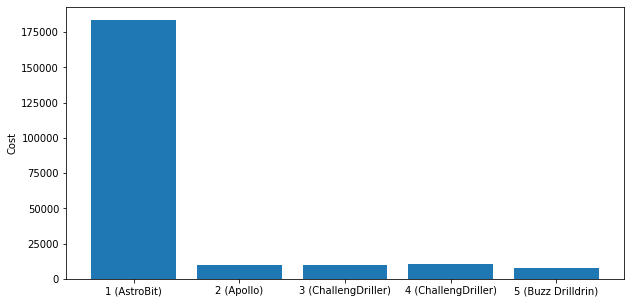

In [143]:
fig = plt.figure(figsize=(10, 5))

plt.bar(drill_bits, costs)
plt.ylabel('Cost')